In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [54]:
#IMPORTING THE DATA
train_data = pd.read_csv("train_data.txt",sep=':::',engine="python", names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(train_data.head())


test_data = pd.read_csv("test_data.txt",sep=':::',engine="python", names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_data.head()))

test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::',engine="python" , names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_solution_data.head()))

ID                               TITLE       GENRE  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

ID                          TITLE  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                               GENRE  DESCRIPTION  
0   L.R. Brane loves his life - his car, his apar...          NaN  
1   Spain, March 1964: Quico is a very naughty ch...          NaN  
2   One year in the life of Albin and his family ...          NaN  
3   His father has died, he hasn't spoken with hi...          NaN  
4   Before he was known internationally as a mart...          NaN

None


ID                          TITLE          GENRE  \
0   1          Edgar's Lunch (1998)       thriller    
1   2      La guerra de papá (1977)         comedy    
2   3   Off the Beaten Track (2010)    documentary    
3   4        Meu Amigo Hindu (2015)          drama    
4   5             Er nu zhai (1955)          drama    

                                         DESCRIPTION  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...

None


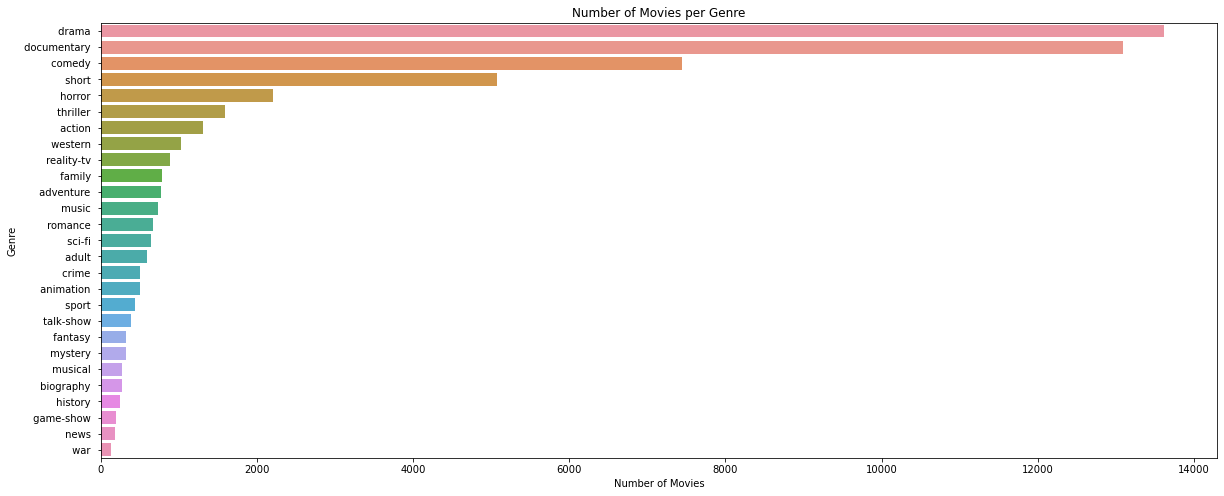

In [20]:
#DATA VISUALIZATION
plt.figure(figsize=(20,8))
sns.countplot(y=train_data['GENRE'], order = train_data['GENRE'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [21]:
#TRAINING DATA
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

In [45]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=32)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

Validation Accuracy: 0.582772295490178


In [44]:
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.09357933579335793


In [60]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "A movie where criminal murders someone"
print("Genre: ",predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie where boy slips on a banana"
print("Genre: ",predict_movie(sample_descr_for_movie1))

sample_descr_for_movie2 = "A movie where a boy has an accident"
print("Genre: ",predict_movie(sample_descr_for_movie2))

sample_descr_for_movie3 = "A movie where there is a haunted house"
print("Genre: ",predict_movie(sample_descr_for_movie3))

Genre:   crime 
Genre:   comedy 
Genre:   drama 
Genre:   horror 
